# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [113]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    # print(lat_lng)
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [114]:
print(cities)

['port-aux-francais', 'adamstown', 'san antonio de pale', 'hamamatsu', 'hammerfest', 'lompoc', 'bethel', 'likiep', 'port elizabeth', 'fortuna', 'darwin', 'ribeira grande', 'lebu', 'isafjordur', 'wynyard', 'ridgecrest', 'namdrik', 'bamboo flat', 'invercargill', 'iskateley', 'puerto ayora', 'mogocha', 'cabo san lucas', 'longyearbyen', 'lethem', 'bengkulu', 'ushuaia', 'thompson', 'bilibino', 'waitangi', 'katabu', 'saipan', 'preobrazheniye', 'vizinga', 'yellowknife', 'edinburgh of the seven seas', 'keren', 'whitehorse', 'bredasdorp', 'mariental', 'sisimiut', 'grytviken', 'tura', 'banjarmasin', 'chipata', 'aasiaat', 'am djarass', 'petropavlovsk-kamchatsky', 'tomatlan', 'mount isa', 'hadibu', 'west island', 'punta arenas', 'hirara', 'labytnangi', 'severo-yeniseyskiy', 'kaiapoi', 'papatowai', 'taiohae', 'kristiansund', 'veracruz', 'stanley', 'college', 'turuntayevo', 'halifax', 'jamestown', 'tolanaro', 'kuanda', 'puerto san carlos', 'olonkinbyen', 'hamilton', 'castillos', 'stepnogorsk', 'molc

In [115]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# city_url = f"{url}appid={weather_api_key}&q={cities[0]}"
# city_weather = requests.get(city_url).json()
# print(json.dumps(city_weather, indent=4, sort_keys=True))
# print(f"lat = {city_weather['coord']['lat']}")
# print(f"lon = {city_weather['coord']['lon']}")
# print(f"max temp = {city_weather['main']['temp_max']}")
# print(f"humidity = {city_weather['main']['humidity']}")
# print(f"clouds = {city_weather['clouds']['all']}")
# print(f"wind = {city_weather['wind']['speed']}")
# print(f"country = {city_weather['sys']['country']}")
# print(f"date = {city_weather['dt']}")

units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | san antonio de pale
Processing Record 4 of Set 1 | hamamatsu
Processing Record 5 of Set 1 | hammerfest
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | likiep
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | darwin
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | wynyard
Processing Record 16 of Set 1 | ridgecrest
Processing Record 17 of Set 1 | namdrik
Processing Record 18 of Set 1 | bamboo flat
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | mogocha
Processing 

In [116]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [117]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,1.76,67,96,11.48,TF,1698625920
1,adamstown,-25.0660,-130.1015,22.52,82,100,4.70,PN,1698625920
2,san antonio de pale,-1.4014,5.6325,26.33,83,55,3.78,GQ,1698625920
3,hamamatsu,34.7000,137.7333,18.90,57,0,0.45,JP,1698625714
4,hammerfest,70.6634,23.6821,-1.75,80,75,1.54,NO,1698625921


In [118]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [119]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.76,67,96,11.48,TF,1698625920
1,adamstown,-25.0660,-130.1015,22.52,82,100,4.70,PN,1698625920
2,san antonio de pale,-1.4014,5.6325,26.33,83,55,3.78,GQ,1698625920
3,hamamatsu,34.7000,137.7333,18.90,57,0,0.45,JP,1698625714
4,hammerfest,70.6634,23.6821,-1.75,80,75,1.54,NO,1698625921


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

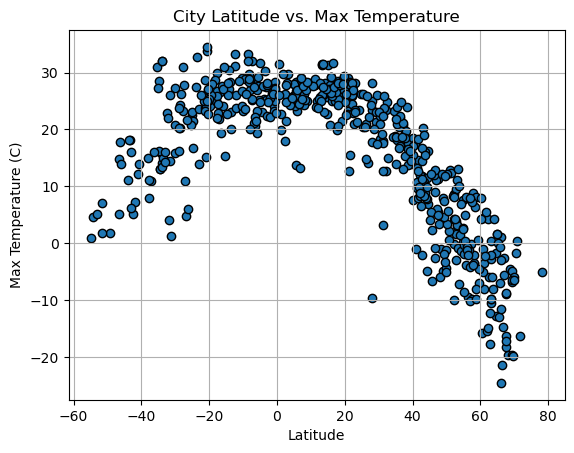

In [120]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

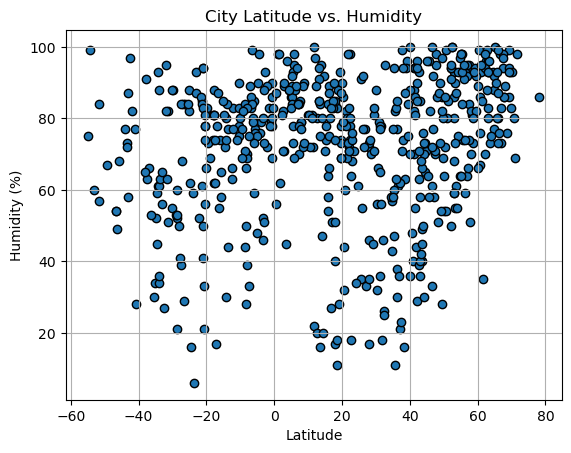

In [121]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

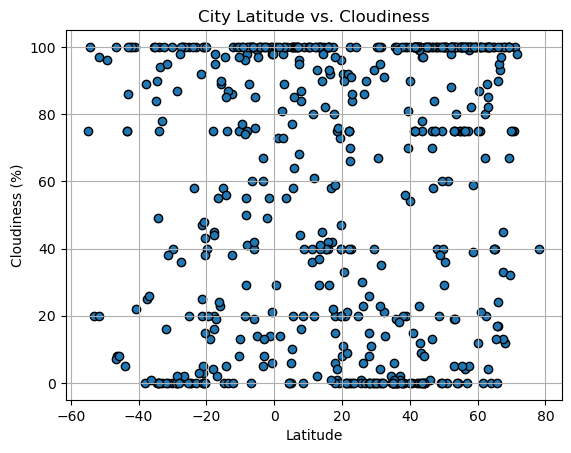

In [122]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

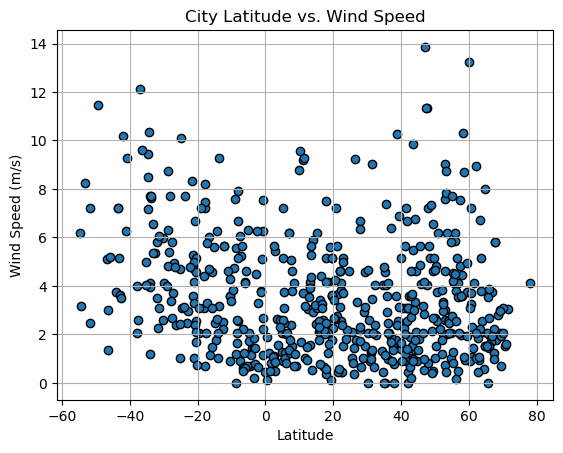

In [123]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values,edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [124]:
# Define a function to create Linear Regression plots
def plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(line_eq_x,line_eq_y),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [125]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hamamatsu,34.7000,137.7333,18.90,57,0,0.45,JP,1698625714
4,hammerfest,70.6634,23.6821,-1.75,80,75,1.54,NO,1698625921
5,lompoc,34.6391,-120.4579,23.16,43,0,4.02,US,1698625313
6,bethel,41.3712,-73.4140,9.64,88,100,3.09,US,1698625753
7,likiep,9.8251,169.3107,28.14,81,100,8.79,MH,1698625921


In [126]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.76,67,96,11.48,TF,1698625920
1,adamstown,-25.0660,-130.1015,22.52,82,100,4.70,PN,1698625920
2,san antonio de pale,-1.4014,5.6325,26.33,83,55,3.78,GQ,1698625920
8,port elizabeth,-33.9180,25.5701,14.16,88,75,4.12,ZA,1698625922
10,darwin,-12.4611,130.8418,31.08,66,86,2.52,AU,1698625626


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7823473905873025


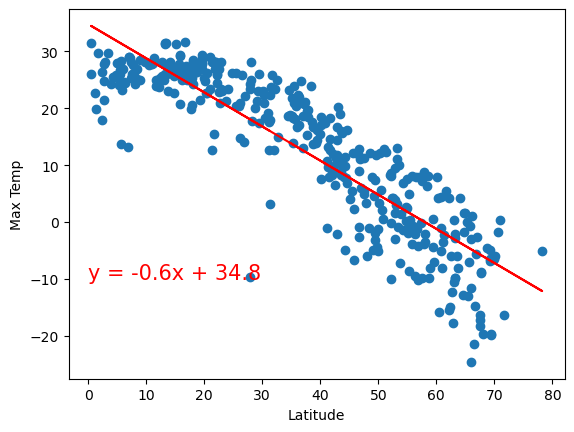

In [127]:
# Linear regression on Northern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp",0,-10)

The r-squared is: 0.45759231474924233


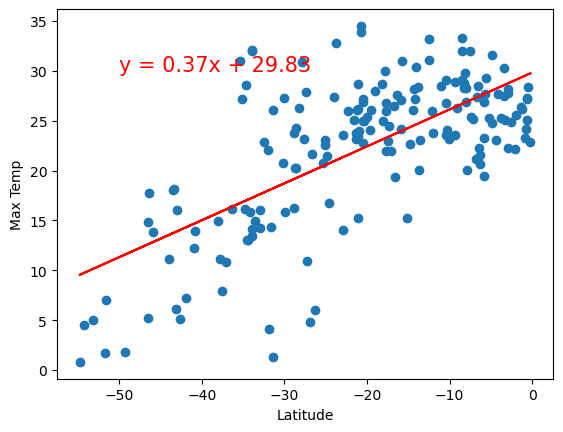

In [128]:
# Linear regression on Southern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp",-50,30)

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a very strong negative correlation between Latititude and Max Temp, where as the Latitude increases, the Max Temp decreases (with r-squared value = 0.7823473905873025). In the Southern Hemisphere, there is a very strong positive correlation between Latitude and Max temp, where as the Latitude increases (towards 0), the Max Temp increases (with r-squared value = 0.45759231474924233)

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.027891383739140695


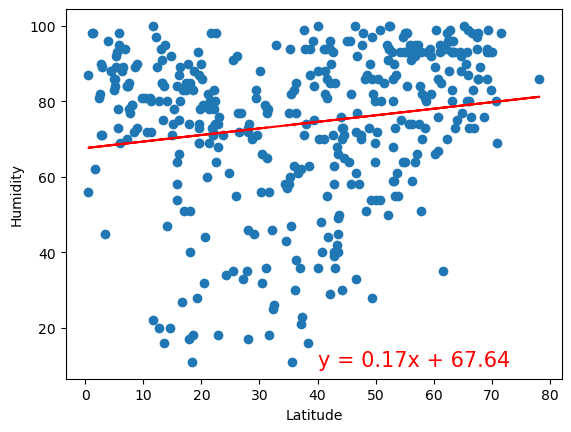

In [129]:
# Northern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity",40,10)

The r-squared is: 0.035932355125551776


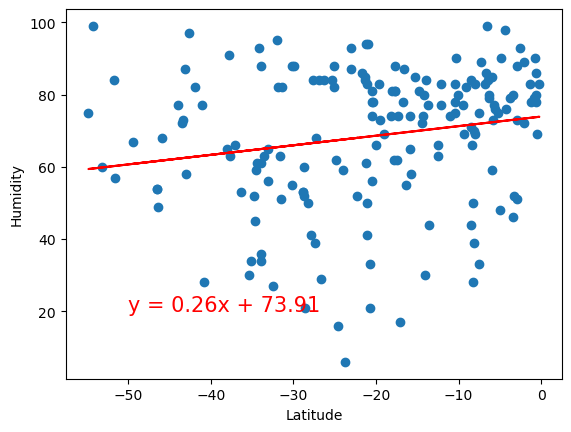

In [130]:
# Southern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity",-50,20)

**Discussion about the linear relationship:** In the Northern and Southern Hemispheres, there is very little correlation between Latitude and Humidity (with corresponding r-values = 0.027891383739140695 and 0.035932355125551776)

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0163286410076478


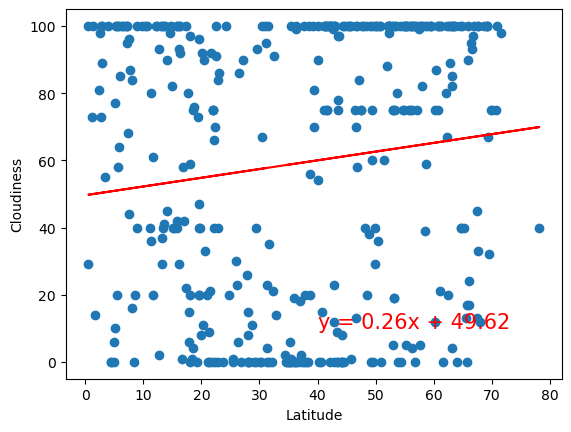

In [131]:
# Northern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness",40,10)

The r-squared is: 0.015041564979438008


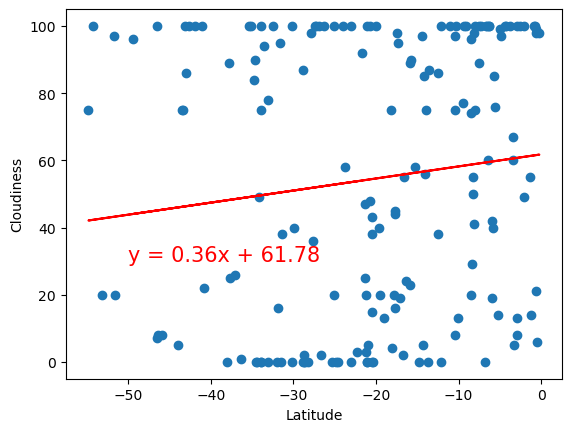

In [132]:
# Southern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness",-50,30)

**Discussion about the linear relationship:** In the Northern and Southern Hemispheres, there is very little correlation between Latitude and Cloudiness (with corresponding r-values = 0.0163286410076478 and 0.015041564979438008)

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.003640770928377614


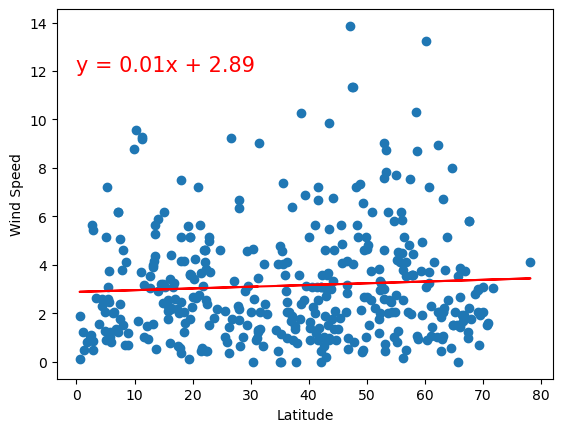

In [133]:
# Northern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed",0,12)

The r-squared is: 0.15738293598161507


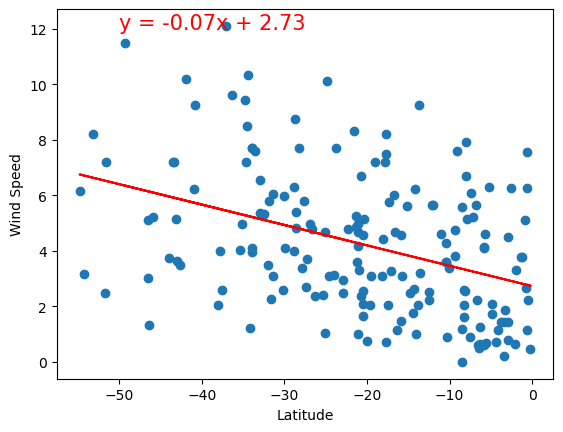

In [134]:
# Southern Hemisphere

# Linear Regression plot function: plot_lin_regress(x_values,y_values,x_label,y_label,line_eq_x, line_eq_y)
# Run once with default values for line_eq_x and line_eq_y, then fix to show on plot and run again
plot_lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed",-50,12)

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a slight positive correlation between Latititude and Wind Speed, where as the Latitude increases, the Wind Speed increases (with r-squared value = The r-squared is: 0.003640770928377614). In the Southern Hemisphere, there is a slight negative correlation between Latititude and Wind Speed, where as the Latitude increases (towards 0), the Max Temp decreases (with r-squared value = 0.15738293598161507)